<a href="https://colab.research.google.com/github/justliya/Algorithm-Projects/blob/main/Stock_Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import requests
from datetime import datetime

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=KCZ7NJNUUHWPQQVG'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'TSLA', '3. Last Refreshed': '2025-05-07 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2025-05-07 19:55:00': {'1. open': '276.0900', '2. high': '276.2000', '3. low': '275.9900', '4. close': '276.1000', '5. volume': '19750'}, '2025-05-07 19:50:00': {'1. open': '276.0500', '2. high': '276.2000', '3. low': '275.9800', '4. close': '276.0000', '5. volume': '19480'}, '2025-05-07 19:45:00': {'1. open': '275.9899', '2. high': '276.2000', '3. low': '275.8500', '4. close': '276.0900', '5. volume': '14238'}, '2025-05-07 19:40:00': {'1. open': '276.2000', '2. high': '276.2300', '3. low': '275.8300', '4. close': '275.9200', '5. volume': '14249'}, '2025-05-07 19:35:00': {'1. open': '276.2500', '2. high': '276.3000', '3. low': '275.8300', '4. close': '276.2300', '5. volume': '12697'}, '2025-05-07 19:30:00': {'1. open': '276.4

In [21]:
time_series = data["Time Series (5min)"]

stock_scan = []

for timestamp, prices in time_series.items():

  threshold = float(prices["2. high"])

  stock_scan.append({'timestamp':timestamp ,'high': threshold })

  stock_scan.sort(key=lambda x: datetime.strptime(x["timestamp"], "%Y-%m-%d %H:%M:%S"))

print(stock_scan)


[{'timestamp': '2025-05-07 11:40:00', 'high': 273.8}, {'timestamp': '2025-05-07 11:45:00', 'high': 273.84}, {'timestamp': '2025-05-07 11:50:00', 'high': 273.57}, {'timestamp': '2025-05-07 11:55:00', 'high': 273.5965}, {'timestamp': '2025-05-07 12:00:00', 'high': 273.229}, {'timestamp': '2025-05-07 12:05:00', 'high': 273.27}, {'timestamp': '2025-05-07 12:10:00', 'high': 273.35}, {'timestamp': '2025-05-07 12:15:00', 'high': 273.62}, {'timestamp': '2025-05-07 12:20:00', 'high': 273.8852}, {'timestamp': '2025-05-07 12:25:00', 'high': 273.5}, {'timestamp': '2025-05-07 12:30:00', 'high': 273.38}, {'timestamp': '2025-05-07 12:35:00', 'high': 273.8171}, {'timestamp': '2025-05-07 12:40:00', 'high': 274.39}, {'timestamp': '2025-05-07 12:45:00', 'high': 274.34}, {'timestamp': '2025-05-07 12:50:00', 'high': 274.34}, {'timestamp': '2025-05-07 12:55:00', 'high': 274.67}, {'timestamp': '2025-05-07 13:00:00', 'high': 274.77}, {'timestamp': '2025-05-07 13:05:00', 'high': 274.56}, {'timestamp': '2025-05

In [22]:
lo = 0
hi = len(stock_scan) - 1

result = None

while lo <= hi:

  mid = (lo + hi) // 2

  check = stock_scan[mid]['high']

  if check >= 275:
    result = mid
    hi = mid - 1

  else:
    lo = mid + 1

if result is not None:
    print(f"First time TSLA hit ≥ 275 was at: {stock_scan[result]['timestamp']} with price {stock_scan[result]['high']}")
else:
    print("TSLA never hit 275 in the data range.")




First time TSLA hit ≥ 275 was at: 2025-05-07 13:10:00 with price 275.11


Full solution in function format

In [23]:
def find_first_threshold_cross(threshold):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=KCZ7NJNUUHWPQQVG'
    r = requests.get(url)
    data = r.json()

      # Check if the expected key exists error handling`
    if "Time Series (5min)" not in data:
        print("Error in API response:")
        print(data)
        return None

    time_series = data["Time Series (5min)"]

    stock_scan = []
    for timestamp, prices in time_series.items():
        high = float(prices["2. high"])
        stock_scan.append({'timestamp': timestamp, 'high': high})

    # Sort in ascending order by timestamp
    stock_scan.sort(key=lambda x: datetime.strptime(x["timestamp"], "%Y-%m-%d %H:%M:%S"))

    # Binary search algorithm to find first time high >= threshold
    lo = 0
    hi = len(stock_scan) - 1
    result = None

    while lo <= hi:
        mid = (lo + hi) // 2
        check = stock_scan[mid]['high']

        if check >= threshold:
            result = mid
            hi = mid - 1
        else:
            lo = mid + 1

    # Results
    if result is not None:
        entry = stock_scan[result]
        print(f"TSLA first hit ≥ {threshold} at {entry['timestamp']} with high: ${entry['high']}")
        return entry
    else:
        print(f"TSLA did not hit ≥ {threshold} in the fetched timeframe.")
        return None

# Call the function threshold
find_first_threshold_cross(275)

TSLA first hit ≥ 275 at 2025-05-07 13:10:00 with high: $275.11


{'timestamp': '2025-05-07 13:10:00', 'high': 275.11}

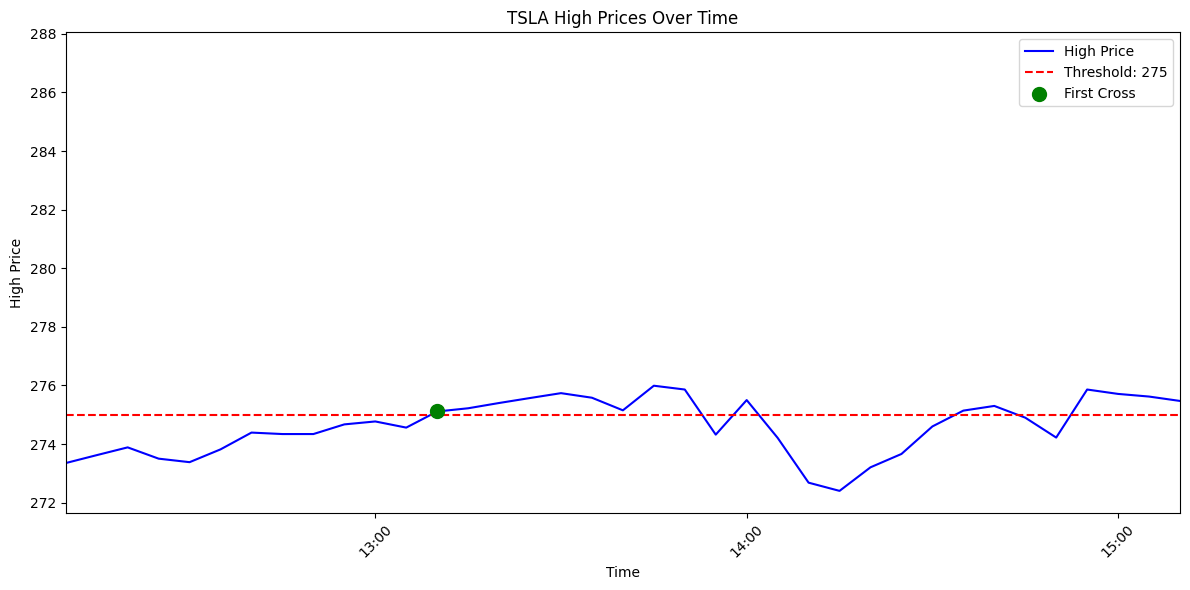

In [24]:
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.dates as mdates


timestamps = [datetime.strptime(entry['timestamp'], "%Y-%m-%d %H:%M:%S") for entry in stock_scan]
highs = [entry['high'] for entry in stock_scan]
first_hit = stock_scan[result]
first_hit_time = datetime.strptime(first_hit['timestamp'], "%Y-%m-%d %H:%M:%S")
first_hit_price = first_hit['high']
target_threshold = 275

plt.figure(figsize=(12, 6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))



plt.xlim(first_hit_time - timedelta(hours= 1), first_hit_time + timedelta(hours= 2))
plt.plot(timestamps, highs, label='High Price', color='blue')
plt.axhline(y=target_threshold , color='red', linestyle='--', label=f'Threshold: {target_threshold}')


plt.scatter(first_hit_time, first_hit_price, color='green', s=100, zorder=5, label='First Cross')

plt.xlabel('Time')
plt.ylabel('High Price')
plt.title('TSLA High Prices Over Time')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("HistoricalData.csv")

Saving HistoricalData.csv to HistoricalData.csv


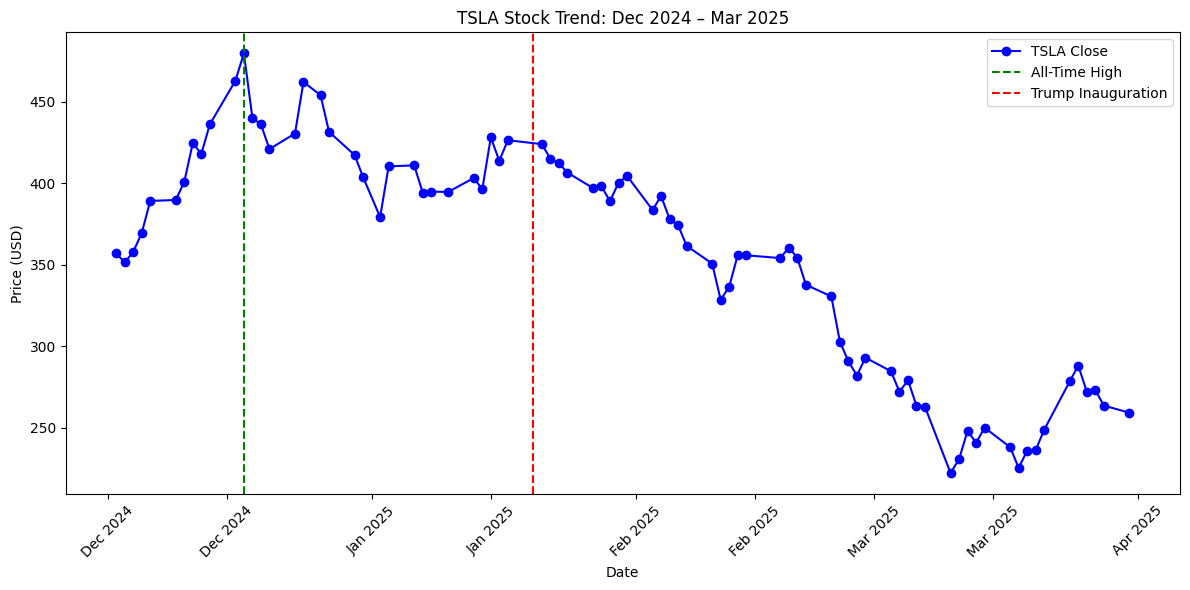

In [26]:
!wget https://raw.githubusercontent.com/justliya/Algorithm-Projects/main/HistoricalData.csv

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

df = pd.read_csv("/content/HistoricalData.csv")


df.rename(columns={"Close/Last": "Close"}, inplace=True)
df["Close"] = df["Close"].replace('[\$,]', '', regex=True).astype(float)
df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values("Date")
df = df[(df["Date"] >= "2024-12-01") & (df["Date"] <= "2025-03-31")]


plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], marker='o', label='TSLA Close', color='blue')

plt.axvline(datetime(2024, 12, 17), color='green', linestyle='--', label='All-Time High')
plt.axvline(datetime(2025, 1, 20), color='red', linestyle='--', label='Trump Inauguration')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("TSLA Stock Trend: Dec 2024 – Mar 2025")
plt.legend()
plt.tight_layout()
plt.show()